## 각 변수들이 어떤 의미를 가지고, 어떤 모습을 보이는지 정리한 파일입니다. 
- 전처리 
- 일변수 탐색
- 다변수 탐색
- 이탈과 관련있는 특정행동을 탐색 

### 패키지 로드

In [1]:
## 분석용 패키지 
import pandas as pd, numpy as np

## 시각화 패키지 
import matplotlib.pylab as plt
import seaborn as sns

## 유틸리티 패키지 
import datetime
from tqdm import tqdm_notebook

### 시각화 설정

In [2]:
## 시각화 설정 
plt.rcParams['figure.figsize'] = [12, 8]

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

### 유틸리티 함수 

In [3]:
# 익명화된 값을 푸는 함수 
def deanonymization(dataframe, columns_list):
    # columns_list에 속한 변수들을 0을 제외한 최솟값으로 나누어서 익명화를 푸는 작업입니다. 
    for i in columns_list:
        try:
            dataframe[i] = (dataframe[i] / dataframe[dataframe[i] != 0][i].min())
        except:
            print("{} 변수가 데이터프레임에 없습니다.".format(i))
    return dataframe

In [4]:
# 서버의 종류를 분류해주는 함수 
def classification_server(dataframe):
    # 서버변수가 있는 dataframe이 들어오면, server가 특화, 일반, NON-PVP 
    # 셋 중 무엇인지 분류해주는 함수입니다. 
    PVP = ['bj', 'bk', 'bl']
    NON_PVP = ['be', 'bf', 'bg', 'bh', 'bi', 'bq', 'bs']
    GENERAL = ['aa','ab','ac','ad','ae','af','ag','ah','ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'bb', 'bc', 'bd', 'bm', 'bn', 'bo', 'bp', 'br']
    
    # 만약 dataframe에 서버변수가 없다면 자기 자신을 출력해주도록 합니다. 
    if 'server' not in dataframe.columns.tolist():
        return dataframe 
    else :
        dataframe['server_class'] = dataframe['server'].apply(lambda x: 'PVP' if x in PVP else ('NON-PVP' if x in NON_PVP else 'GENERAL'))
        return dataframe

In [5]:
# 서버의 종류를 분류해주는 함수 
def classification_level(dataframe):
    # 레벨변수가 있는 dataframe이 들어오면, 초보, 중수, 고수
    # 셋 중 무엇인지 분류해주는 함수입니다. 
    # 만약 dataframe에 레벨변수가 없다면 자기 자신을 출력해주도록 합니다. 
    if 'level' not in dataframe.columns.tolist():
        return dataframe
    elif 'acc_id' not in dataframe.columns.tolist():
        return dataframe
    else :
        dataframe_max_level = dataframe.groupby(['acc_id'])['level'].agg({'max'}).reset_index()
        dataframe_max_level['level_class'] = dataframe_max_level['max'].apply(lambda x: 'Hasu' if x <= 7 else ('Joongsu' if x <= 16 else 'Gosu'))
        dataframe_max_level = dataframe_max_level[['acc_id','level_class']]
        dataframe = dataframe.merge(dataframe_max_level,how='left',on=['acc_id'])
        return dataframe

### 데이터 로드 

In [6]:
# activity.csv : 캐릭터별 활동 이력. 
train_activity = pd.read_csv("./input/train_activity.csv")
test1_activity = pd.read_csv("./input/test1_activity.csv")
test2_activity = pd.read_csv("./input/test2_activity.csv")

train_activity['type'] = 'train'
test1_activity['type'] = 'test1'
test2_activity['type'] = 'test2'

# train과 test를 모두 합쳐서 분석 진행. 
activity = pd.concat([train_activity,test1_activity],axis=0)
activity = pd.concat([activity,test2_activity],axis=0)

In [7]:
activity[(activity['death'] != 0) & (activity['death'] == activity['revive'])].shape[0] / activity[(activity['death'] != 0)].shape[0]

0.0

In [8]:
# combat.csv : 캐릭터별 전투 이력
train_combat = pd.read_csv("./input/train_combat.csv")
test1_combat = pd.read_csv("./input/test1_combat.csv")
test2_combat = pd.read_csv("./input/test2_combat.csv")

train_combat['type'] = 'train'
test1_combat['type'] = 'test1'
test2_combat['type'] = 'test2'

# train과 test를 모두 합쳐서 분석 진행. 
combat = pd.concat([train_combat,test1_combat],axis=0)
combat = pd.concat([combat,test2_combat],axis=0)

In [9]:
# pledge.csv 소속 혈맹 전투 활동 정보 
train_pledge = pd.read_csv("./input/train_pledge.csv")
test1_pledge = pd.read_csv("./input/test1_pledge.csv")
test2_pledge = pd.read_csv("./input/test2_pledge.csv")

train_pledge['type'] = 'train'
test1_pledge['type'] = 'test1'
test2_pledge['type'] = 'test2'

# train과 test를 모두 합쳐서 분석 진행. 
pledge = pd.concat([train_pledge,test1_pledge],axis=0)
pledge = pd.concat([pledge,test2_pledge],axis=0)

In [10]:
# trade.csv 거래 이력 
train_trade = pd.read_csv("./input/train_trade.csv")
test1_trade = pd.read_csv("./input/test1_trade.csv")
test2_trade = pd.read_csv("./input/test2_trade.csv")

train_trade['type'] = 'train'
test1_trade['type'] = 'test1'
test2_trade['type'] = 'test2'

# train과 test를 모두 합쳐서 분석 진행. 
trade = pd.concat([train_trade,test1_trade],axis=0)
trade = pd.concat([trade,test2_trade],axis=0)

In [11]:
# label.csv 
train_label = pd.read_csv("./input/train_label.csv")

In [12]:
train_payment = pd.read_csv("./input/train_payment.csv")
test1_payment = pd.read_csv("./input/test1_payment.csv")
test2_payment = pd.read_csv("./input/test2_payment.csv")

In [13]:
combat.head()

day  acc_id  char_id server  class  level  pledge_cnt  random_attacker_cnt  \
0    1   13809    54861     ap      2     13         0.0                  0.0   
1    1   13809   256332     ap      2     13         0.0                  0.0   
2    1   13809   307293     ap      3     14         0.0                  0.0   
3    1   13809   374964     ap      7     16         0.0                  0.0   
4    1   13809   117917     ap      2     11         0.0                  0.0   

   random_defender_cnt  temp_cnt  same_pledge_cnt   etc_cnt  num_opponent  \
0                  0.0       0.0              0.0  0.000000      0.000000   
1                  0.0       0.0              0.0  0.000000      0.000000   
2                  0.0       0.0              0.0  0.000000      0.000000   
3                  0.0       0.0              0.0  0.112612      0.098129   
4                  0.0       0.0              0.0  0.000000      0.000000   

    type  
0  train  
1  train  
2  train  
3  train  
4  train

### 데이터의 이해
- activity : 캐릭터별 활동 이력
    - 사냥 
        - solo_exp
        - party_exp
        - quest_exp
        - rich_monster 
        - death
        - revive
        - exp_recovery
    - 돈
        - fishing
        - private_shop 
        - game_money_change
    - 강화
        - enchant_count 
- combat : 캐릭터별 전투 이력
    - 개인 
        - class
        - level
    - 전투 횟수 
        - pledge_cnt
        - temp_cnt
        - same_pledge_cnt
        - etc_cnt
    - 막피
        - random_attacker_cnt
        - random_defender_cnt
        - num_opponent
- payment : 결제 데이터
    - 결제 
        - amount_spent : 
- pledge : 혈맹 전투 활동
    - 혈맹원의 전투 활동 내역
        - pledge_combat_cnt
        - random_attacker_cnt
        - random_defender_cnt
        - same_pledge_cnt
        - temp_cnt
        - etc_cnt 
    - 혈맹의 활동 내역
        - play_char_cnt
        - combat_char_cnt
        - combat_play_time
        - non_combat_play_time 
- trade : 거래 이력 
    - source 
        - source_acc_id
        - source_char_id 
    - target
        - target_acc_id
        - target_char_id
    - item
        - item_type
        - item_amount
        - item_price

### 전처리 
- 변수명 : rich_monster -> boss_monster 
- death와 revive의 값이 같지 않음. variance로 나누어서 생긴 문제. 
    - decode해서 서로 같게 만들어 줌. 

### 디코딩
- activity 
    - ['playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count']
- combat
    - ['pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent']
- pledge 
    - ['play_char_cnt',
       'combat_char_cnt', 'pledge_combat_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'same_pledge_cnt', 'temp_cnt', 'etc_cnt',
       'combat_play_time', 'non_combat_play_time'] 
- trade 
    - ['item_amount', 'item_price'] 
- payment
    - ['amount_spent'] 

In [14]:
de_activity = ['playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count']

de_combat = ['pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent']

de_pledge = ['play_char_cnt',
       'combat_char_cnt', 'pledge_combat_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'same_pledge_cnt', 'temp_cnt', 'etc_cnt',
       'combat_play_time', 'non_combat_play_time']

de_trade = ['item_amount', 'item_price']

de_payment = ['amount_spent'] 

### 일변수 분석

In [15]:
activity.head()

day  acc_id  char_id server  playtime  npc_kill  solo_exp  party_exp  \
0    1   75001   397380     aa  1.441844  0.000000  0.000000   0.000000   
1    1   75001   216231     aa  0.283219  2.247978  0.047085   0.000000   
2    1   75711   308769     aa  1.036910  2.956638  0.321821   0.166593   
3    1   72230   387177     aa  0.229384  4.042102  0.099147   0.000000   
4    1   34253   339862     aa  1.088405  0.596802  0.003377   0.000000   

   quest_exp  rich_monster     death    revive  exp_recovery  fishing  \
0   0.000000             0  0.000000  0.000000           0.0      0.0   
1   0.000000             0  0.000000  0.000000           0.0      0.0   
2   0.003470             1  0.245883  0.247337           0.0      0.0   
3   0.001735             0  0.000000  0.000000           0.0      0.0   
4   0.000000             0  0.000000  0.000000           0.0      0.0   

   private_shop  game_money_change  enchant_count   type  
0       1.10514           0.034006            0.0  train  
1       0.00000          -0.013963            0.0  train  
2       0.00000          -0.001987            0.0  train  
3       0.00000          -0.028884            0.0  train  
4       0.00000           0.011777            0.0  train

In [16]:
activity = deanonymization(activity, de_activity)
activity.head()

day  acc_id  char_id server  playtime  npc_kill   solo_exp  party_exp  \
0    1   75001   397380     aa     616.0       0.0        0.0        0.0   
1    1   75001   216231     aa     121.0    6652.0   624841.0        0.0   
2    1   75711   308769     aa     443.0    8749.0  4270723.0   592034.0   
3    1   72230   387177     aa      98.0   11961.0  1315725.0        0.0   
4    1   34253   339862     aa     465.0    1766.0    44821.0        0.0   

   quest_exp  rich_monster  death  revive  exp_recovery  fishing  \
0       0.00           0.0    0.0     0.0           0.0      0.0   
1       0.00           0.0    0.0     0.0           0.0      0.0   
2     450.82           1.0    1.0     1.0           0.0      0.0   
3     225.41           0.0    0.0     0.0           0.0      0.0   
4       0.00           0.0    0.0     0.0           0.0      0.0   

   private_shop  game_money_change  enchant_count   type  
0       28329.0          -0.000380            0.0  train  
1           0.0           0.000156            0.0  train  
2           0.0           0.000022            0.0  train  
3           0.0           0.000323            0.0  train  
4           0.0          -0.000132            0.0  train

In [17]:
print('                min,      max')
print('playtime     : ',activity['playtime'].min(), activity['playtime'].max())
print('fishing      : ',activity['fishing'].min(), activity['fishing'].max())
print('private_shop : ',activity['private_shop'].min(), activity['private_shop'].max())

                min,      max
playtime     :  0.0 1440.0000000000002
fishing      :  0.0 86399.99999999981
private_shop :  0.0 86399.99999999981


In [18]:
activity[(activity['death'] != 0) & (activity['death'] == activity['revive'])].shape[0] / activity[(activity['death'] != 0)].shape[0]

0.6831962254015633

quest_exp 소숫점 

In [19]:
activity = classification_server(activity)
activity = classification_level(activity)
activity = deanonymization(activity, de_activity)
activity.head()

day  acc_id  char_id server  playtime  npc_kill   solo_exp  party_exp  \
0    1   75001   397380     aa     616.0       0.0        0.0        0.0   
1    1   75001   216231     aa     121.0    6652.0   624841.0        0.0   
2    1   75711   308769     aa     443.0    8749.0  4270723.0   592034.0   
3    1   72230   387177     aa      98.0   11961.0  1315725.0        0.0   
4    1   34253   339862     aa     465.0    1766.0    44821.0        0.0   

   quest_exp  rich_monster  death  revive  exp_recovery  fishing  \
0       0.00           0.0    0.0     0.0           0.0      0.0   
1       0.00           0.0    0.0     0.0           0.0      0.0   
2     450.82           1.0    1.0     1.0           0.0      0.0   
3     225.41           0.0    0.0     0.0           0.0      0.0   
4       0.00           0.0    0.0     0.0           0.0      0.0   

   private_shop  game_money_change  enchant_count   type server_class  
0       28329.0           0.000373            0.0  train      GENERAL  
1           0.0          -0.000153            0.0  train      GENERAL  
2           0.0          -0.000022            0.0  train      GENERAL  
3           0.0          -0.000317            0.0  train      GENERAL  
4           0.0           0.000129            0.0  train      GENERAL

In [83]:
activity.shape

(3073650, 19)

In [84]:
activity[(activity['fishing'] > 0) & (activity['playtime'] == 0)].shape

(12804, 19)

In [81]:
activity['playtime'].max()

1440.0000000000002

In [69]:
activity['fishing'].max()

86399.99999999981

In [71]:
86399.99999999981 / 60

1439.9999999999968

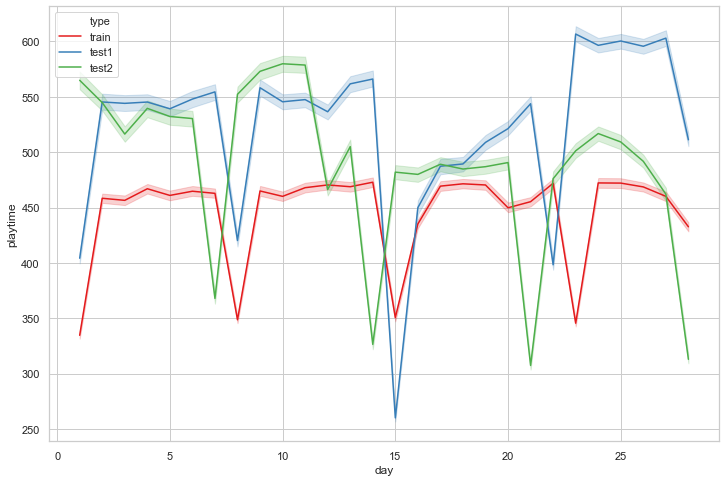

In [17]:
# Scatter plot by Groups
value = 'playtime'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)

plt.show()

- 특징1. 1주일의 주기마다 playtime이 떨어지는 것을 보임. (수요일 - 정기점검 / 근데 연휴가끼거나 업데이트가 잘못되면 목요일날 하기도 함)
    - Q. train과 test1은 같고, test2만 다른걸로 봐서는 day1이 서로 같은 요일을 의미하는게 아닐 수도 있을 것 같음. 
        - 실제로 다른 요일을 의미함. 
    - test2의 day 28은 3월 27일 수요일임. 정기점검이어서 값 떨어지는것까지 정확함.(https://lineage.plaync.com/board/notice/view?articleId=4069325&page=8&categoryId=0&viewMode=list&size=20) 
        - test2 : 2월 28일(day1 목요일) ~ 3월 27일(day28 수요일) 
            - 3월 27일부터 리니지 리마스터가 시작되었음. 
        - test1 : 11월 28일(day1 수요일) ~ 12월 26일(day28 화요일)
            - 11월 27일 리니지 리마스터 발표 
        - train : 9월 5일(day1 수요일) ~ 10월 2일(day28 화요일)
- 특징2. 전반적으로 test가 train보다 playtime이 큼. 
    - **이유는 알 수 없음** 

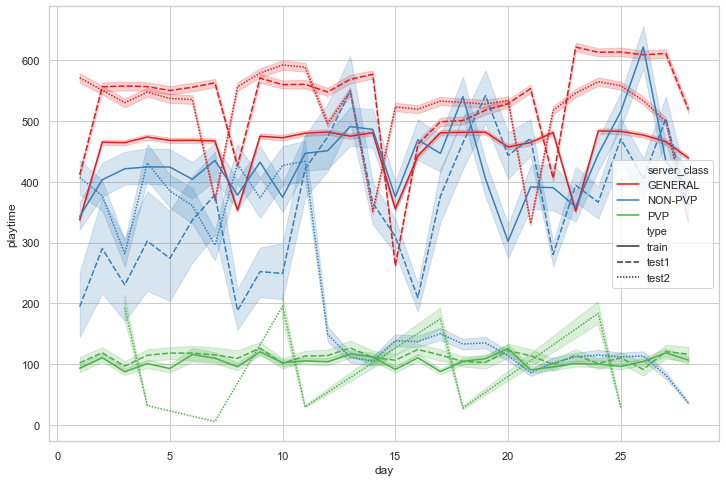

In [18]:
# Scatter plot by Groups
value = 'playtime'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)

plt.show()

- 특징1. GENERAL > NON-PVP > PVP으로 사람들의 플레이 시간이 김. 
    - NON-PVP와 GENERAL이 막피당할 가능성이 더 적음. 
    - GENERAL이 NON-PVP보다 사람들이 더 활발함. 
    - 서버 특성상 NON-PVP가 튜토리얼 느낌이라 상대적으로 PLAY시간이 짧음
    - **Q. PVP가 NON-PVP보다 플레이시간이 짧은 이유는 잘 모르겠음.** 
- 특징2. test2의 non_pvp가 급격하게 playtime이 떨어짐. 
    - 확인결과 11일에서 12일로 넘어가면서 기존에 없었던 새로운 NON-PVP 서버가 등장함. 근데 이게 playtime이 매우 안좋음. 
- 특징3. 다른 서버는 playtime이 비슷하고, 오히려 NON-PVP는 train이 더 높지만, 가장 많은 사람들이 플레이하는 일반서버에서 train이 더 사람들이 높은 모습을 보임. 

npc가 몹인지 모름. 

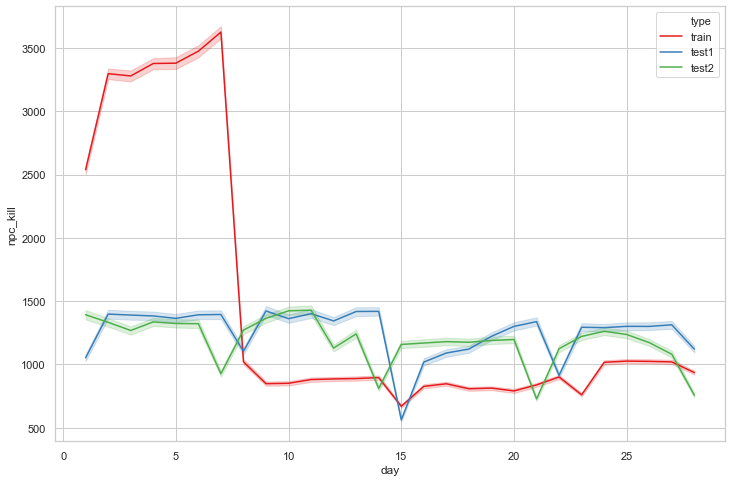

In [19]:
# Scatter plot by Groups
value = 'npc_kill'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)

plt.show()

In [23]:
activity[(activity['npc_kill']==0) & (activity['solo_exp']>0)].shape

(127992, 19)

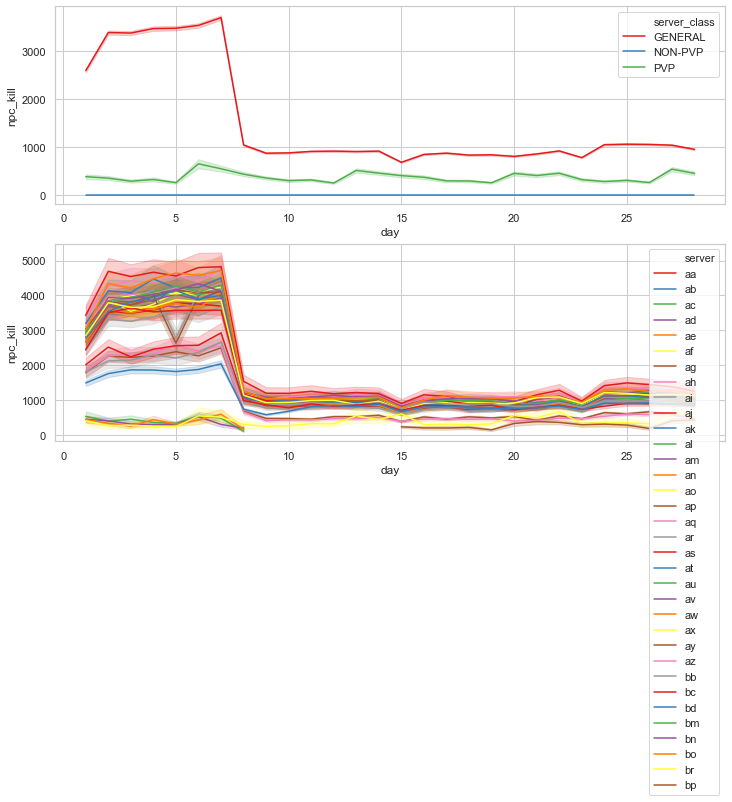

In [27]:
# Scatter plot by Groups
activity_train = activity[activity['type']=='train']
value = 'npc_kill'

plt.subplot(2,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                # style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity_train)

# Scatter plot by Groups
activity_train_general = activity_train[activity_train['server_class']=='GENERAL']
value = 'npc_kill''

plt.subplot(2,1,2)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server',  #different colors by group
                # style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity_train_general)

plt.show()

- 특징1 : NPC_kill이 의미하는 것은 미니언을 잡는 것? 
    - 아니라고 생각하는게 npc_kill이 0인데 solo_exp가 0보다 큰게 많음. 약12만개. 
    - 공성전이 진행되면 경비병이 나오는것 같은데, 이때 잡은것을 의미할 수 있음. 
- 특징2 : Npc_kill을 왜 하는지 모르겠음. 
- 특징3 : test와 test2의 npc_kill은 비슷한데, train의 npc_kill이 급격하게 떨어짐. 
    - **사람들의 인기가 많은 모든 일반서버에서 같은 현상을 보이는것을 봐서는 업데이트라든지 어떤 이슈가 있었던것 같음.**
    - 업데이트 살펴봤는데, 봐도 잘 모르겠음 ㅠㅠ... 
    - 후보. http://www.inven.co.kr/board/lineage/3761/1540?p=7

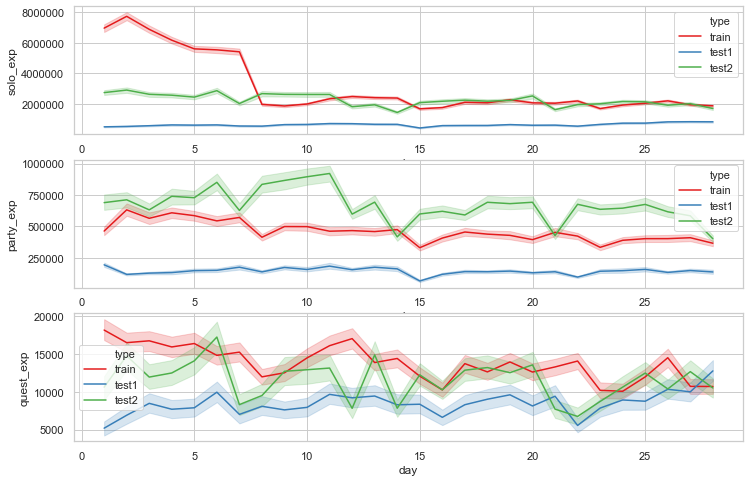

In [28]:
# Scatter plot by Groups
value = 'solo_exp'
plt.subplot(3,1,1)
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)

plt.subplot(3,1,2)
# Scatter plot by Groups
value = 'party_exp'
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)

plt.subplot(3,1,3)
# Scatter plot by Groups
value = 'quest_exp'
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)

plt.show()

- 특징1. solo_exp와 npc_kill이 비슷한 모습을 보임. 이렇게 봐서는 npc_kill -> solo_exp...? 

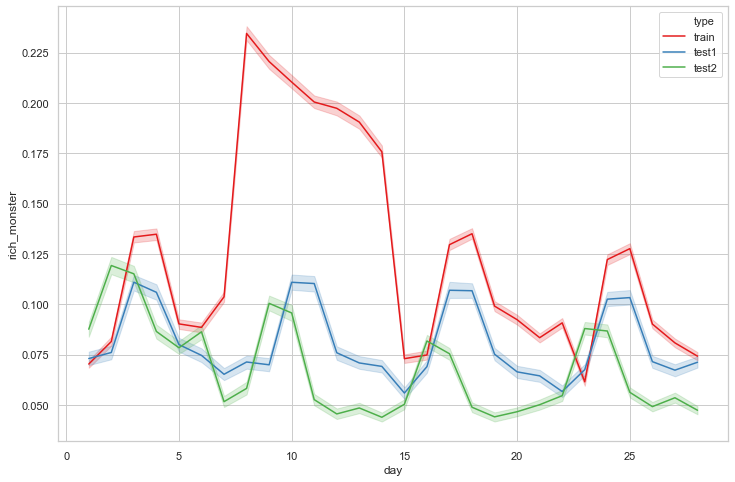

In [29]:
# Scatter plot by Groups
value = 'rich_monster'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)

plt.show()

- 특징1. 7~8일쯤부터 npc_kill, solo_exp이 감소하는것과 동시에 rich_monster의 잡는 횟수는 늘어듬. 
- 특징2. 저 시점이 추석으로 예상되는데, 추석에 뭔가 이벤트가 있었나? 

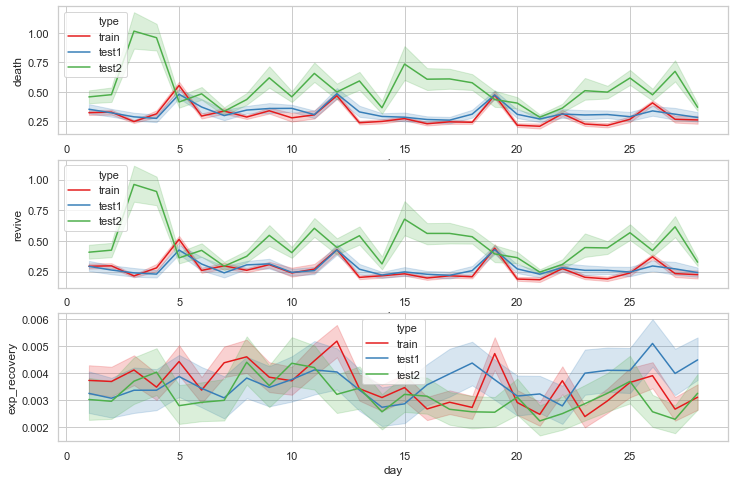

In [33]:
# Scatter plot by Groups
value = 'death'
plt.subplot(3,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.subplot(3,1,2)
value = 'revive'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.subplot(3,1,3)
value = 'exp_recovery'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.show()

- 특징1. Death와 Revive는 비슷한 모습을 보임.(거의 똑같은 듯) 
- 특징2. exp_recovery같은 경우는 고랩에서 의미가 있다고 함. 그리고 1회 -> 2회 이렇게 넘어갈 수록 비싸진다고 들음. 
- 특징3. death와 revive의 train과 test1의 비율은 매우 비슷한 반면, test2에서 갑작스럽게 바뀜.

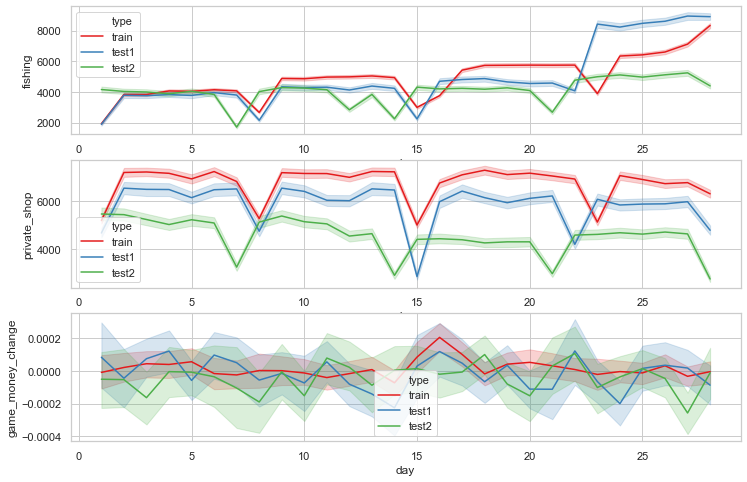

In [34]:
# Scatter plot by Groups
value = 'fishing'
plt.subplot(3,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.subplot(3,1,2)
value = 'private_shop'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.subplot(3,1,3)
value = 'game_money_change'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.show()

- 특징1. fishing의 값은 초(s)고 play_time은 분(60s)임. 그래서 둘 값의 차이를 비교하려면 60을 곱하거나 나누고 해야 함. 
- 특징2. fishing에서 train, test1에서 마지막주는 저런 모습을 보이고, test2는 반대의 모습을 보임. 
- 특징3. private_shop과 play_time 비교해보면 사람들의 행동유형이 조금 바뀜. (아래그림)

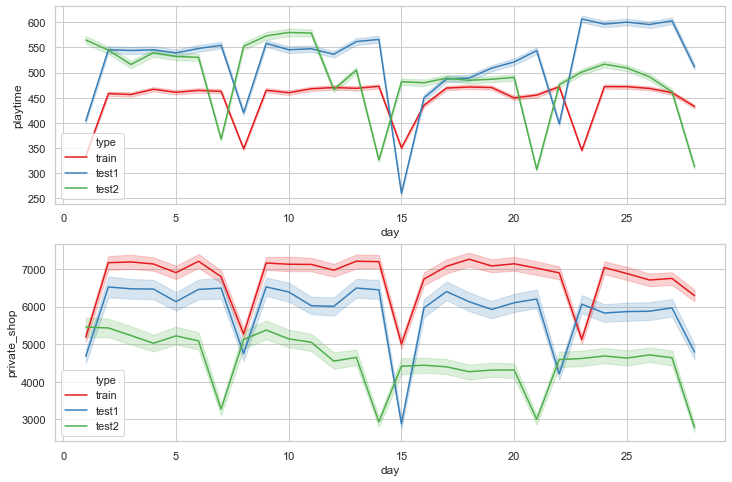

In [37]:
# Scatter plot by Groups
value = 'playtime'
plt.subplot(2,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.subplot(2,1,2)
value = 'private_shop'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.show()

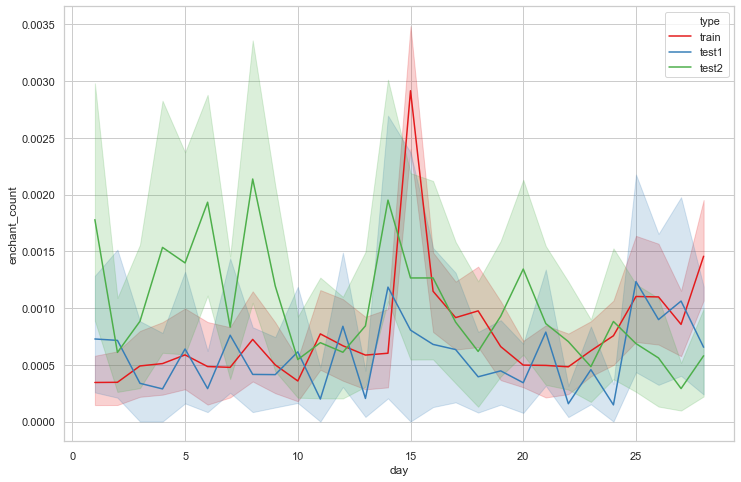

In [20]:
value = 'enchant_count'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = activity)
plt.show()

15일 부근에 enchant_count의 평균이 급증하는 모습을 보이고 test2에서는 5일 부근에도 많은데, 아마 업글 이벤트나 아이템이 있지 않았을 까 싶음. 

In [43]:
combat = classification_server(combat)
combat = classification_level(combat)
combat = deanonymization(combat, de_combat)
combat.head()

day  acc_id  char_id server  class  level  pledge_cnt  random_attacker_cnt  \
0    1   13809    54861     ap      2     13         0.0                  0.0   
1    1   13809   256332     ap      2     13         0.0                  0.0   
2    1   13809   307293     ap      3     14         0.0                  0.0   
3    1   13809   374964     ap      7     16         0.0                  0.0   
4    1   13809   117917     ap      2     11         0.0                  0.0   

   random_defender_cnt  temp_cnt  same_pledge_cnt  etc_cnt  num_opponent  \
0                  0.0       0.0              0.0      0.0           0.0   
1                  0.0       0.0              0.0      0.0           0.0   
2                  0.0       0.0              0.0      0.0           0.0   
3                  0.0       0.0              0.0      1.0           1.0   
4                  0.0       0.0              0.0      0.0           0.0   

    type server_class level_class  
0  train      GENERAL     Joongsu  
1  train      GENERAL     Joongsu  
2  train      GENERAL     Joongsu  
3  train      GENERAL     Joongsu  
4  train      GENERAL     Joongsu

In [102]:
combat.groupby(['type','server_class','level_class']).agg({'count'})

day   acc_id  char_id   server    class  \
                                  count    count    count    count    count   
type  server_class level_class                                                
test1 GENERAL      Gosu          134663   134663   134663   134663   134663   
                   Hasu           64623    64623    64623    64623    64623   
                   Joongsu       483572   483572   483572   483572   483572   
      PVP          Gosu           13253    13253    13253    13253    13253   
                   Joongsu          466      466      466      466      466   
test2 GENERAL      Gosu          141174   141174   141174   141174   141174   
                   Hasu           50873    50873    50873    50873    50873   
                   Joongsu       506144   506144   506144   506144   506144   
      NON-PVP      Gosu             384      384      384      384      384   
                   Hasu               5        5        5        5        5   
                   Joongsu         1875     1875     1875     1875     1875   
      PVP          Gosu            2525     2525     2525     2525     2525   
                   Joongsu           80       80       80       80       80   
train GENERAL      Gosu          354602   354602   354602   354602   354602   
                   Hasu          155965   155965   155965   155965   155965   
                   Joongsu      1029218  1029218  1029218  1029218  1029218   
      PVP          Gosu           33723    33723    33723    33723    33723   
                   Joongsu         1163     1163     1163     1163     1163   

                                  level pledge_cnt random_attacker_cnt  \
                                  count      count               count   
type  server_class level_class                                           
test1 GENERAL      Gosu          134663     134663              134663   
                   Hasu           64623      64623               64623   
                   Joongsu       483572     483572              483572   
      PVP          Gosu           13253      13253               13253   
                   Joongsu          466        466                 466   
test2 GENERAL      Gosu          141174     141174              141174   
                   Hasu           50873      50873               50873   
                   Joongsu       506144     506144              506144   
      NON-PVP      Gosu             384        384                 384   
                   Hasu               5          5                   5   
                   Joongsu         1875       1875                1875   
      PVP          Gosu            2525       2525                2525   
                   Joongsu           80         80                  80   
train GENERAL      Gosu          354602     354602              354602   
                   Hasu          155965     155965              155965   
                   Joongsu      1029218    1029218             1029218   
      PVP          Gosu           33723      33723               33723   
                   Joongsu         1163       1163                1163   

                               random_defender_cnt temp_cnt same_pledge_cnt  \
                                             count    count           count   
type  server_class level_class                                                
test1 GENERAL      Gosu                     134663   134663          134663   
                   Hasu                      64623    64623           64623   
                   Joongsu                  483572   483572          483572   
      PVP          Gosu                      13253    13253           13253   
                   Joongsu                     466      466             466   
test2 GENERAL      Gosu                     141174   141174          141174   
                   Hasu                      50873    50873           50873   
                   Joongsu     

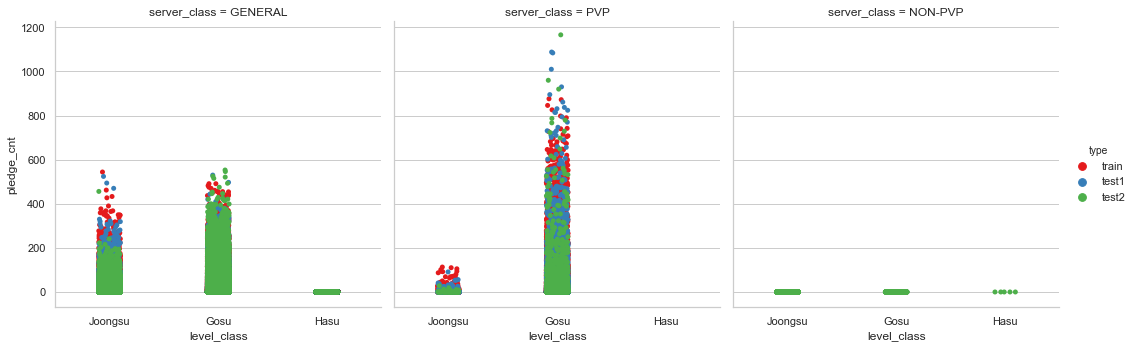

In [49]:
value = 'pledge_cnt'

sns.catplot(x = 'level_class', 
                y = value, 
                hue = 'type',  #different colors by group
                col = 'server_class', 
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)
plt.show()

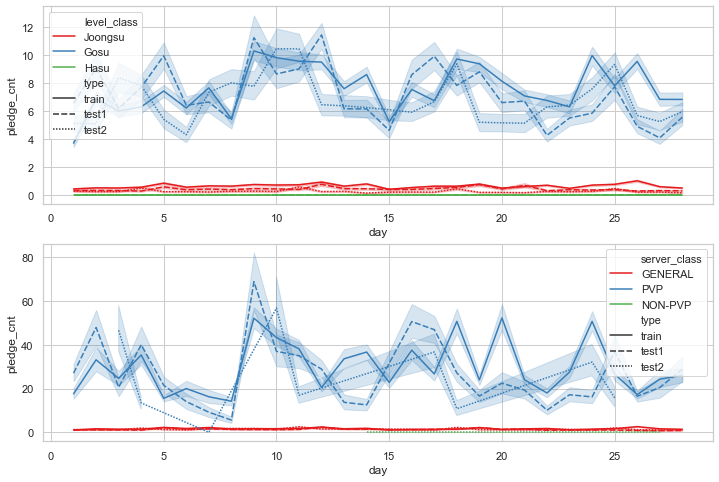

In [53]:
# Scatter plot by Groups
value = 'pledge_cnt'
plt.subplot(2,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'level_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.subplot(2,1,2)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.show()

- 특징1. 혈맹간의 전투는 PVP서버에서만 거의 일어나고 그 외 서버에서는 잘 일어나지 않음.
- 특징2. PVP서버에서도 고수들 사이에서만 일어남. 중수는 있긴 하지만 거의 끼지도 못함...

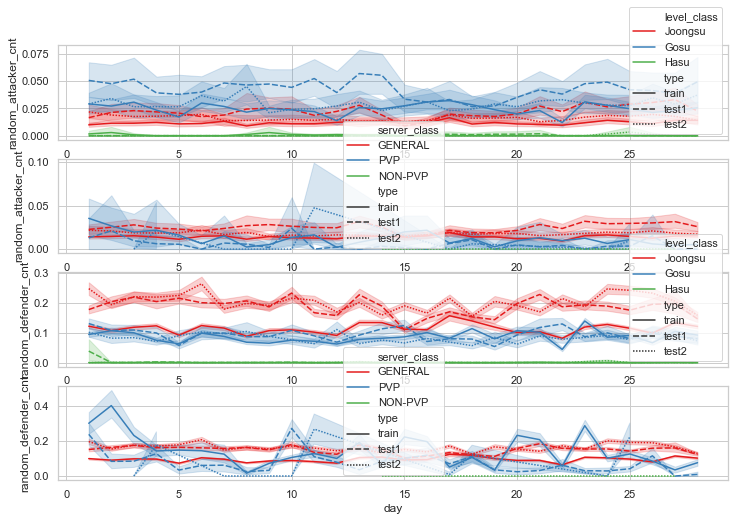

In [54]:
# Scatter plot by Groups
value = 'random_attacker_cnt'
plt.subplot(4,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'level_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.subplot(4,1,2)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

# Scatter plot by Groups
value = 'random_defender_cnt'
plt.subplot(4,1,3)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'level_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.subplot(4,1,4)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.show()

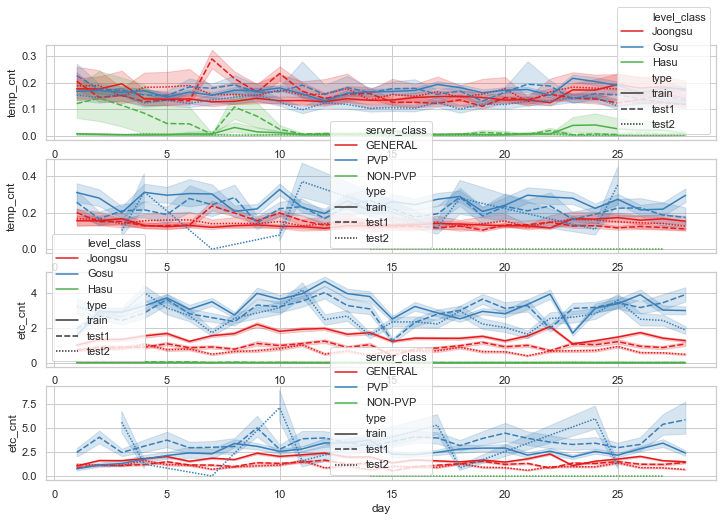

In [55]:
# Scatter plot by Groups
value = 'temp_cnt'
plt.subplot(4,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'level_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.subplot(4,1,2)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

# Scatter plot by Groups
value = 'etc_cnt'
plt.subplot(4,1,3)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'level_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.subplot(4,1,4)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.show()

```
- temp_cnt : 단발성 전투 횟수(소규모)
- etc_cnt : 기타 전투 횟수(???) 
``` 




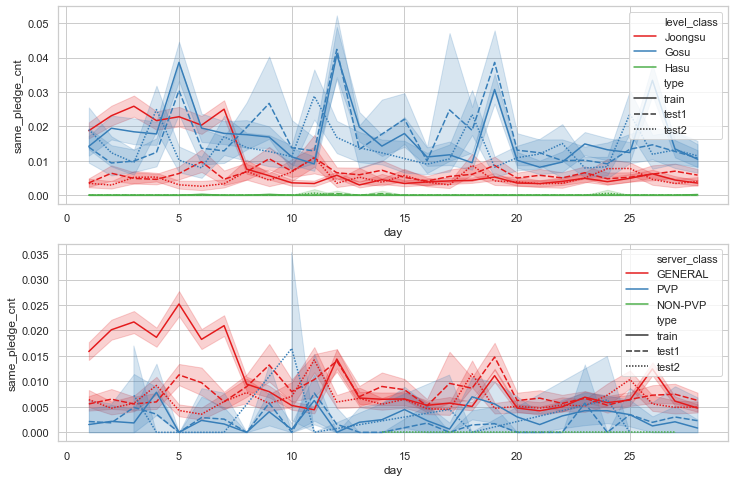

In [65]:
# Scatter plot by Groups
value = 'same_pledge_cnt'
plt.subplot(2,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'level_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.subplot(2,1,2)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)
plt.show()

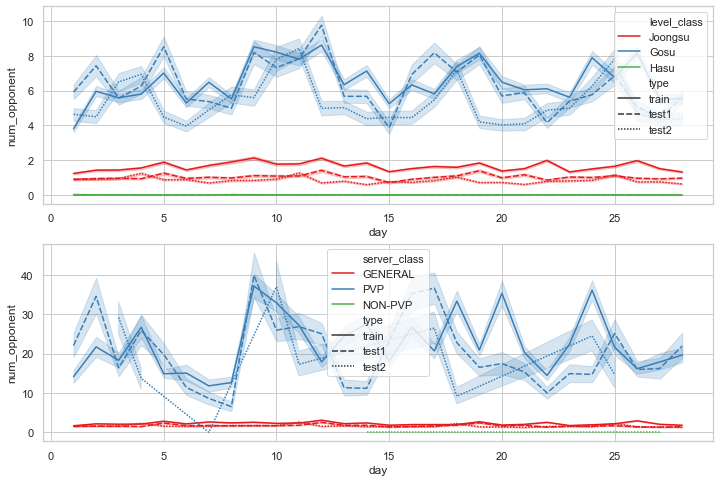

In [56]:
# Scatter plot by Groups
value = 'num_opponent'
plt.subplot(2,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'level_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)

plt.subplot(2,1,2)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = combat)
plt.show()

In [57]:
trade.head()

day      time   type server  source_acc_id  source_char_id  target_acc_id  \
0    7  21:13:05  train     ag          11439          385109          48152   
1    2  15:33:00  train     al          22220          259705          43228   
2    1  14:24:53  train     al          18212          164230          38145   
3    7  23:13:43  train     au         121622           49839          71226   
4    2  12:43:33  train     bd          14421          344503          65220   

   target_char_id       item_type   item_amount  item_price  
0           34247  enchant_scroll  4.793968e-08         NaN  
1          379826  enchant_scroll  4.314571e-06         NaN  
2           34209       accessory  7.190952e-08         NaN  
3          281334           adena  9.587936e-03         NaN  
4          210558             etc  1.198492e-07    0.000639

In [58]:
trade[(trade['source_acc_id'] == 11439) & (trade['target_acc_id'] == 50058)]

day      time   type server  source_acc_id  source_char_id  \
919259    15  19:40:12  train     ag          11439          385109   
924588    15  20:03:49  train     ag          11439          385109   
1145760   15  20:06:12  train     ag          11439          385109   
1283438   15  19:50:47  train     ag          11439          385109   

         target_acc_id  target_char_id item_type  item_amount  item_price  
919259           50058          223536       etc     0.003212         NaN  
924588           50058          223536       etc     0.016335         NaN  
1145760          50058          223536       etc     0.010727         NaN  
1283438          50058          223536       etc     0.033426         NaN

In [59]:
trade[(trade['target_acc_id'] == 11439) & (trade['source_acc_id'] == 50058)]

day      time   type server  source_acc_id  source_char_id  \
1052462   15  20:03:49  train     ag          50058          223536   
1156358   15  19:40:12  train     ag          50058          223536   
1281882   15  20:06:12  train     ag          50058          223536   
1320155   15  19:50:47  train     ag          50058          223536   

         target_acc_id  target_char_id item_type  item_amount  item_price  
1052462          11439          385109     adena     0.019583         NaN  
1156358          11439          385109     adena     0.003854         NaN  
1281882          11439          385109     adena     0.012872         NaN  
1320155          11439          385109     adena     0.040111         NaN

source_acc_id와 target_acc_id를 서로 바꾸면 겹치는 값이 있고 (동일한 거래를 수행한 내역) 아닌 값들이 있음. 

생각1. 동일한 거래를 의미하는데, 만일 길드간의 거래처럼 아이템이나 아데나를 주기만 했다면 받는사람은 어떻게 찍힐까? 


In [60]:
trade['item_type'].value_counts()

etc               1370471
adena              619248
armor              386625
enchant_scroll     384081
accessory          271613
weapon             150990
spell              102122
Name: item_type, dtype: int64

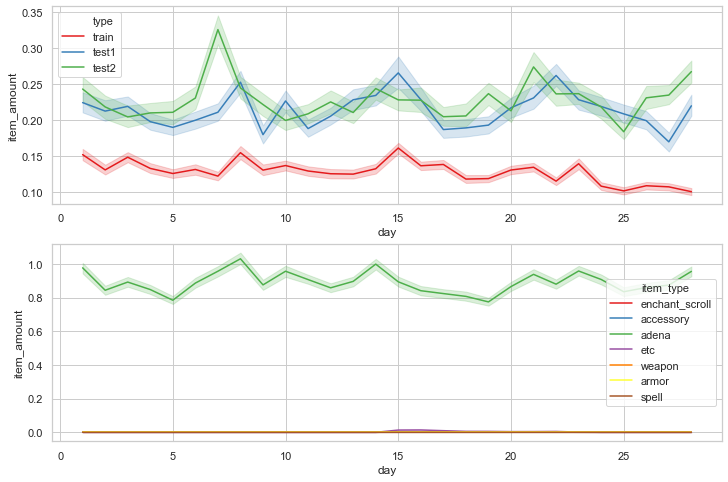

In [61]:
value = 'item_amount'
plt.subplot(2,1,1)

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = trade)
plt.subplot(2,1,2)
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'item_type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = trade)
plt.show()

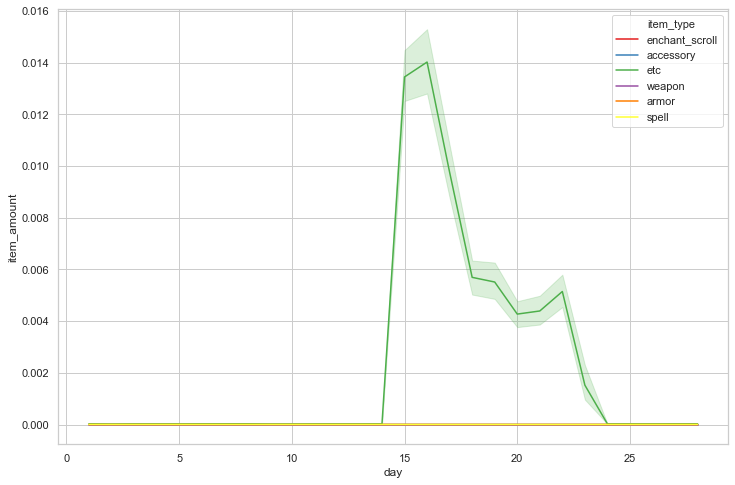

In [62]:
trade_adena = trade[trade['item_type'] != 'adena']
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'item_type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = trade_adena)
plt.show()

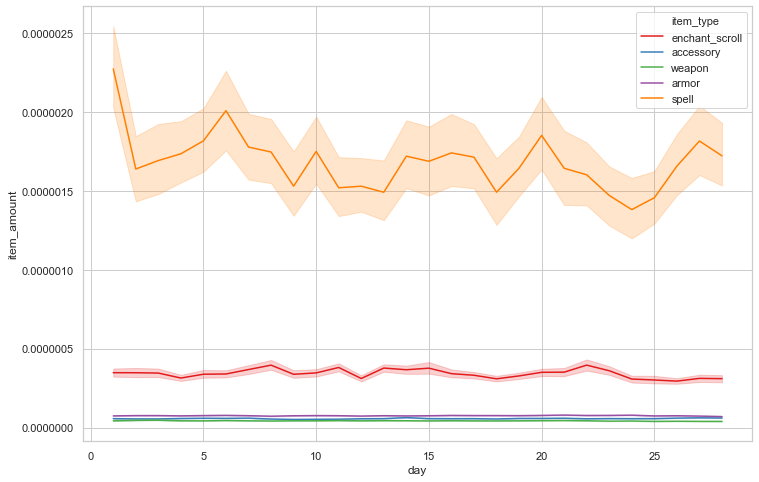

In [63]:
trade_adena_etc = trade_adena[trade_adena['item_type'] != 'etc']
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'item_type',  #different colors by group
                # style='species', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = trade_adena_etc)
plt.show()

In [64]:
pledge.head()

day  acc_id  char_id server  pledge_id  play_char_cnt  combat_char_cnt  \
0    1  106660   345122     aa        381       0.036089         0.036089   
1    1   46383   161773     aa      10892       0.036089         0.000000   
2    1   18495   321373     aa      13705       0.036089         0.000000   
3    1  118293   366707     aa       2982       0.036089         0.000000   
4    1   50421   158063     aa      27104       0.216536         0.072179   

   pledge_combat_cnt  random_attacker_cnt  random_defender_cnt  \
0                0.0                  0.0                  0.0   
1                0.0                  0.0                  0.0   
2                0.0                  0.0                  0.0   
3                0.0                  0.0                  0.0   
4                0.0                  0.0                  0.0   

   same_pledge_cnt  temp_cnt   etc_cnt  combat_play_time  \
0              0.0  0.000000  0.007078          0.027568   
1              0.0  0.000000  0.000000          0.000000   
2              0.0  0.000000  0.000000          0.000000   
3              0.0  0.000000  0.000000          0.000000   
4              0.0  0.098883  0.056626          0.083978   

   non_combat_play_time   type  
0              0.000000  train  
1              0.006139  train  
2              0.000347  train  
3              0.001042  train  
4              0.000000  train

In [66]:
pledge = classification_server(pledge)
pledge = classification_level(pledge)
pledge = deanonymization(pledge, de_pledge)
pledge.head()

day  acc_id  char_id server  pledge_id  play_char_cnt  combat_char_cnt  \
0    1  106660   345122     aa        381            1.0              1.0   
1    1   46383   161773     aa      10892            1.0              0.0   
2    1   18495   321373     aa      13705            1.0              0.0   
3    1  118293   366707     aa       2982            1.0              0.0   
4    1   50421   158063     aa      27104            6.0              2.0   

   pledge_combat_cnt  random_attacker_cnt  random_defender_cnt  \
0                0.0                  0.0                  0.0   
1                0.0                  0.0                  0.0   
2                0.0                  0.0                  0.0   
3                0.0                  0.0                  0.0   
4                0.0                  0.0                  0.0   

   same_pledge_cnt  temp_cnt  etc_cnt  combat_play_time  non_combat_play_time  \
0              0.0       0.0      1.0             238.0                   0.0   
1              0.0       0.0      0.0               0.0                  53.0   
2              0.0       0.0      0.0               0.0                   3.0   
3              0.0       0.0      0.0               0.0                   9.0   
4              0.0       1.0      8.0             725.0                   0.0   

    type server_class  
0  train      GENERAL  
1  train      GENERAL  
2  train      GENERAL  
3  train      GENERAL  
4  train      GENERAL

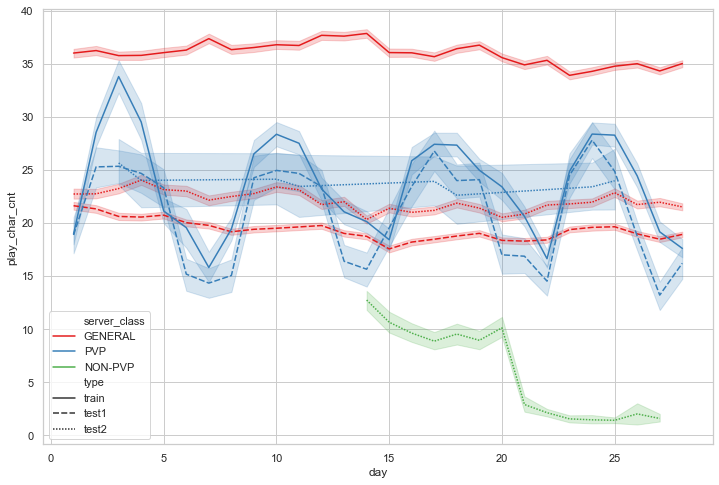

In [72]:
# Scatter plot by Groups
value = 'play_char_cnt'
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()

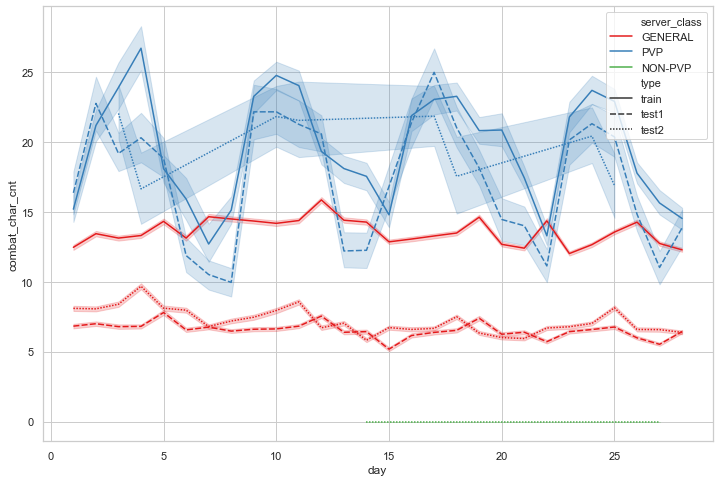

In [73]:
# Scatter plot by Groups
value = 'combat_char_cnt'
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()

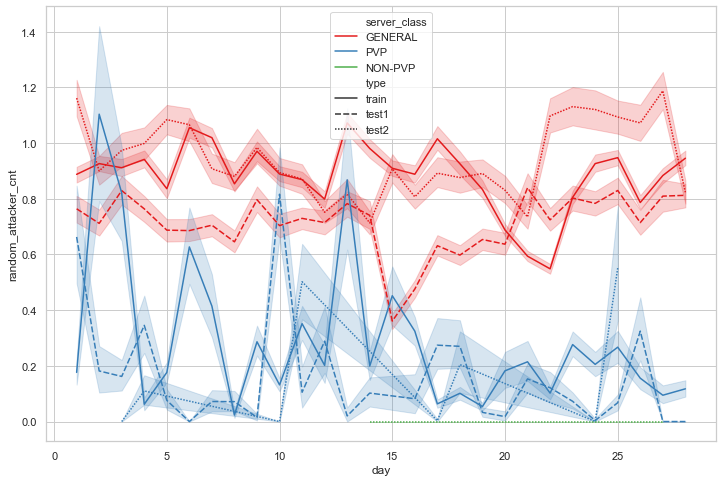

In [74]:
# Scatter plot by Groups
value = 'random_attacker_cnt'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()

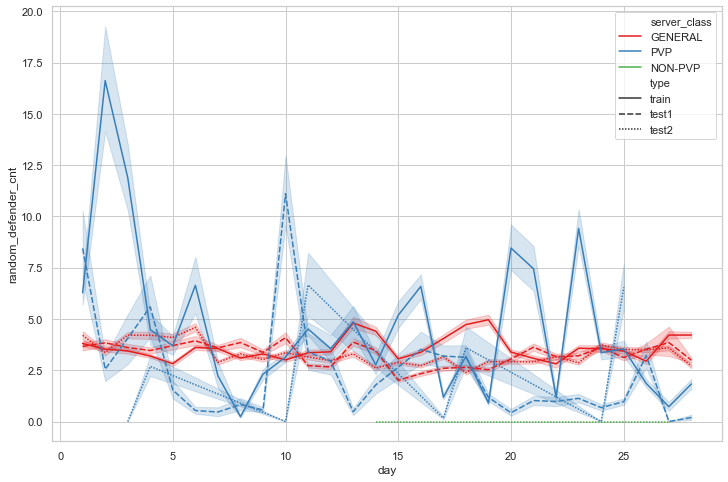

In [75]:
# Scatter plot by Groups
value = 'random_defender_cnt'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()

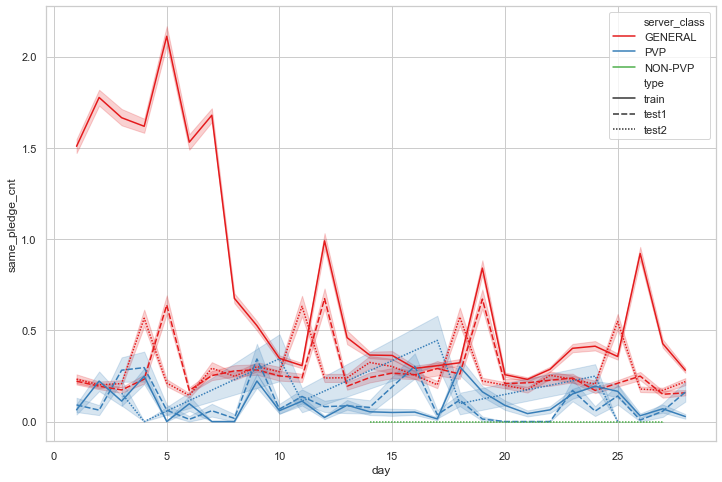

In [76]:
# Scatter plot by Groups
value = 'same_pledge_cnt'
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()

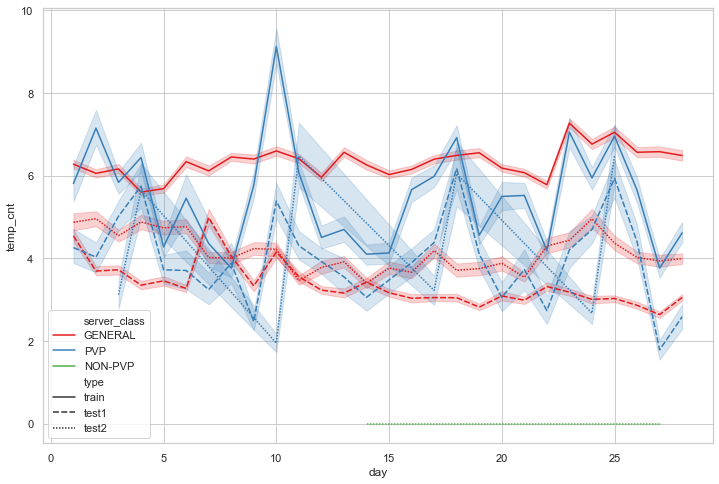

In [77]:
# Scatter plot by Groups
value = 'temp_cnt'
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()

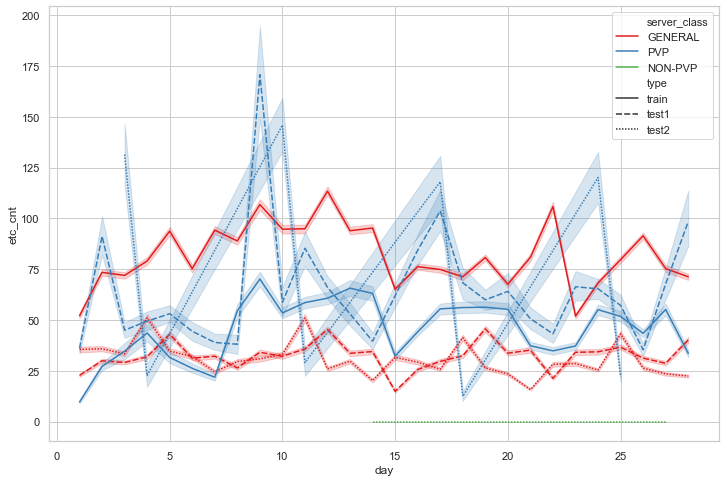

In [78]:
# Scatter plot by Groups
value = 'etc_cnt'

sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()

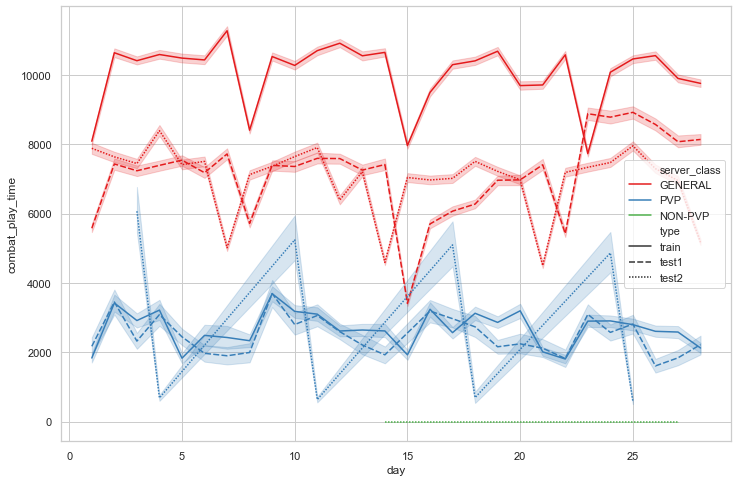

In [79]:
# Scatter plot by Groups
value = 'combat_play_time'
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()

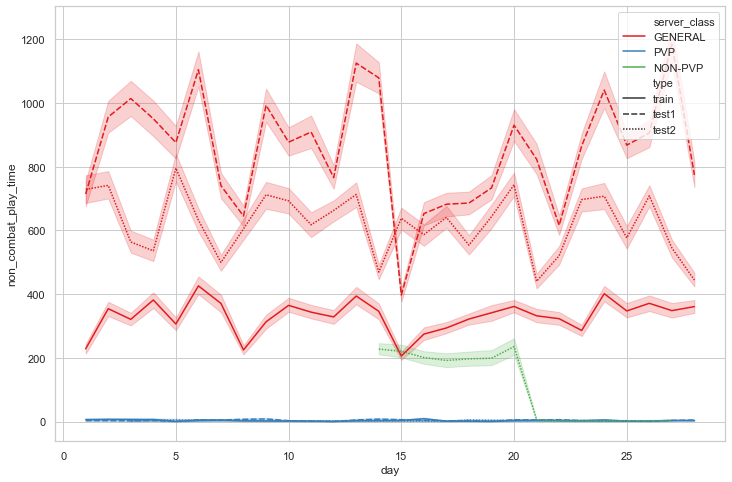

In [80]:
# Scatter plot by Groups
value = 'non_combat_play_time'
sns.lineplot(x = 'day', 
                y = value, 
                hue = 'server_class',  #different colors by group
                style='type', # different shapes by group
                # s = 30, # marker size
                palette="Set1",                 
                data = pledge)
plt.show()